In [59]:
# For Table of Contents
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

SyntaxError: invalid syntax (<ipython-input-59-d1c751f99c18>, line 2)

# BT2101 HW2 Notebook

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
from math import sqrt
%matplotlib inline

In [3]:
# Import dataset into Python Pandas DataFrame
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
#Getting list of column headers
features_list = df.columns.tolist()
print(features_list)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
#Checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 1. Data Manipulation

### 1.1 Cleaning up the data

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Correct the data type of TotalCharges
#Total Charges is left blank for customers who have stayed with the company for
#less than 1 month, tenure = 0
df['TotalCharges'] = df['TotalCharges'].replace(' ',0) #replacing spaces with 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [8]:
#Using number of unique values to differentiate categorical variables from numerical variables
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
#List of different types of features
id_list = ['customerID',]
target_list = ['Churn',]
num_list = [col for col in df.columns if df[col].nunique()>4 and col not in id_list]
cat_list = [col for col in df.columns if df[col].nunique()<=4 and col not in target_list]

In [10]:
#Checking for columns that should be binary but have >2 unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
#Replace 'No internet service' with 'No'
for i in ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']:
    df[i] = df[i].replace({'No internet service': 'No'})

In [12]:
#Checking that categorical columns with >2 unique values are not binary variables
print(df['MultipleLines'].unique())
print(df['InternetService'].unique())
print(df['PaymentMethod'].unique())

['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [13]:
#Replace 'No phone service' with 'No'
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

In [14]:
#Creating list of binary features
b_list = [col for col in cat_list if df[col].nunique()==2]

## 2. Exploratory Data Analysis

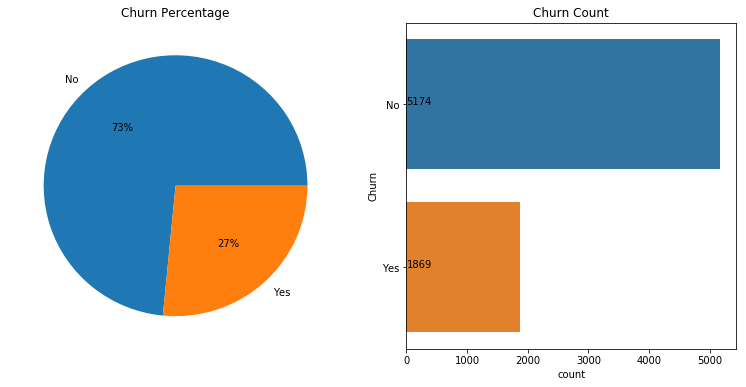

In [15]:
# Overall Churn
plt.figure(figsize=(13,6))

plt.subplot(1,2,1) #nrows, ncols, index
df['Churn'].value_counts().plot.pie(autopct  = "%1.0f%%")
plt.title('Churn Percentage')
plt.ylabel("")

plt.subplot(1,2,2)
ax = sns.countplot(y = df['Churn'])
for i,j in enumerate(df['Churn'].value_counts().values): ax.text(.1,i,j)
plt.title('Churn Count')

plt.show()

### 2.1 EDA For Categorical Variables

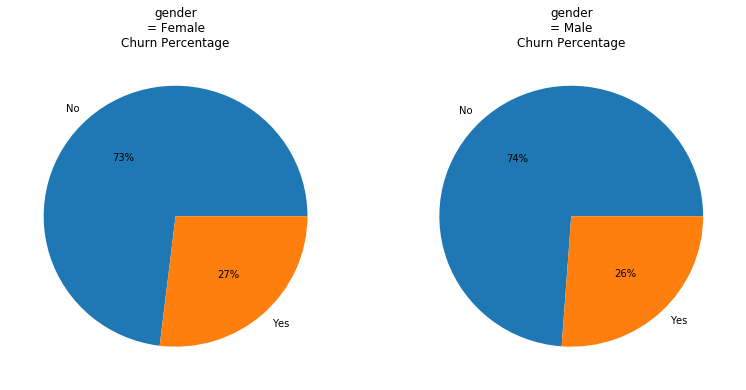

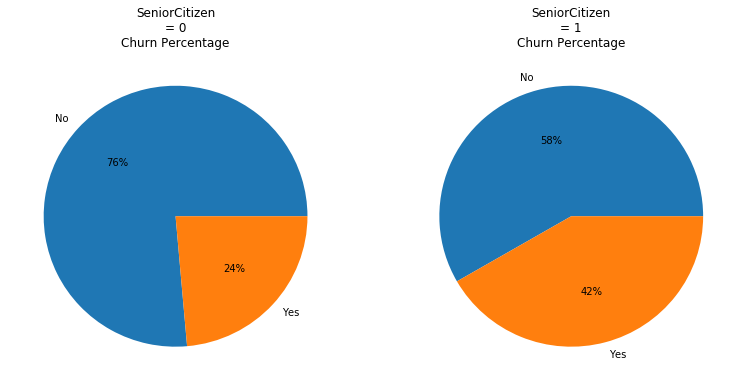

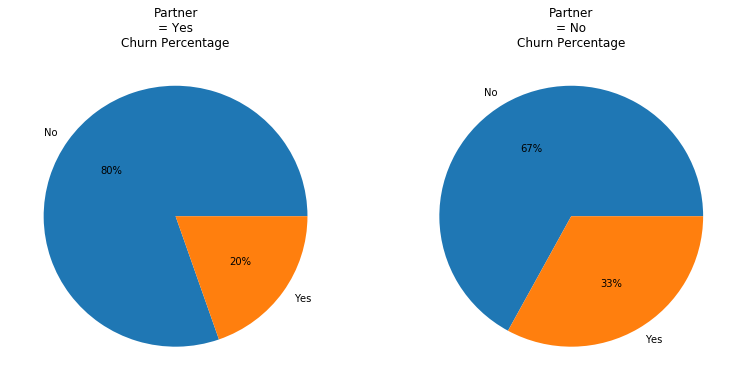

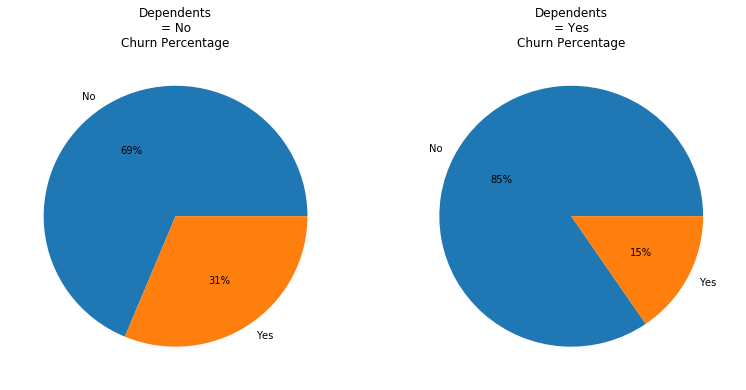

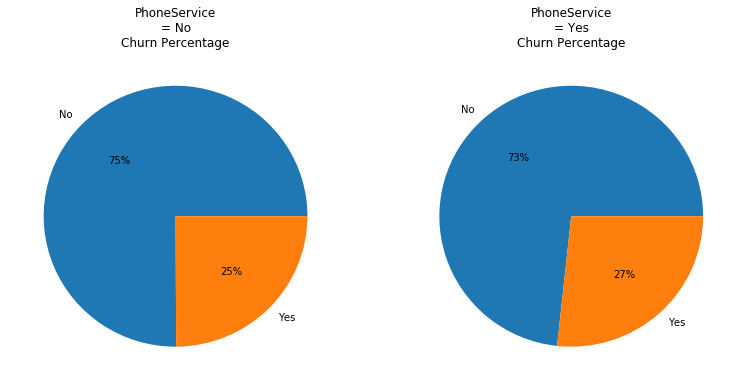

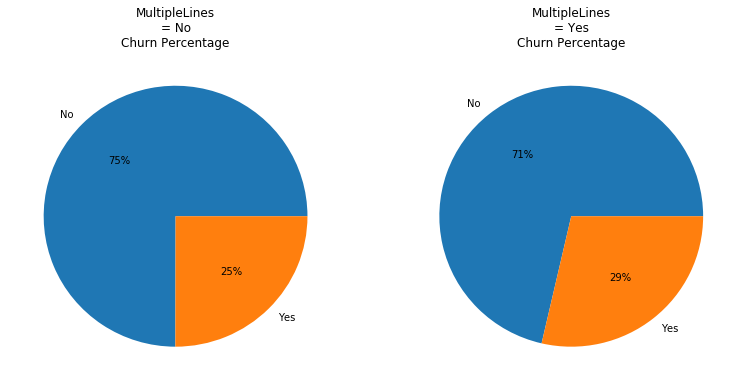

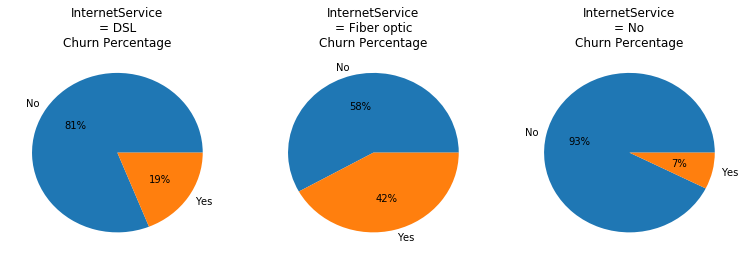

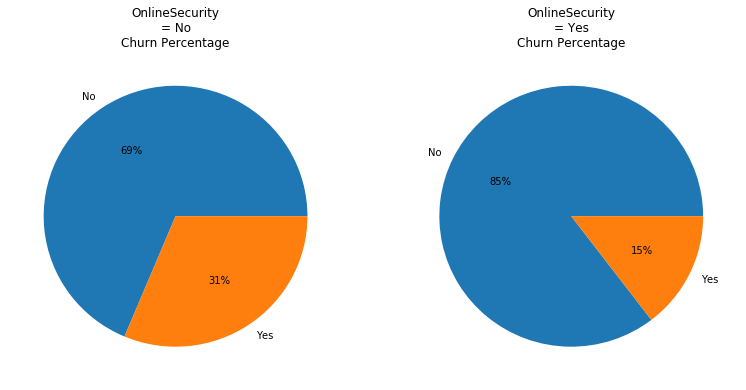

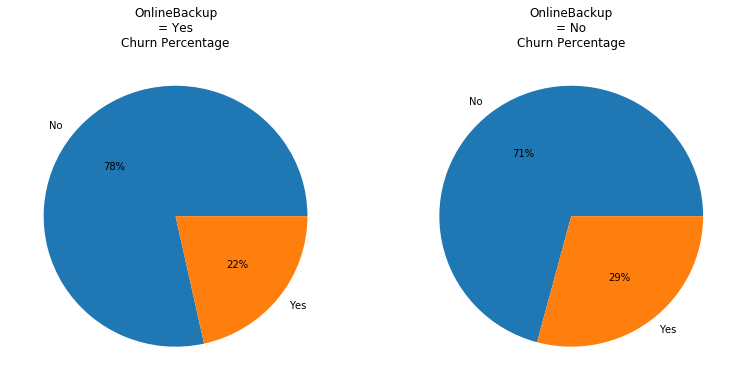

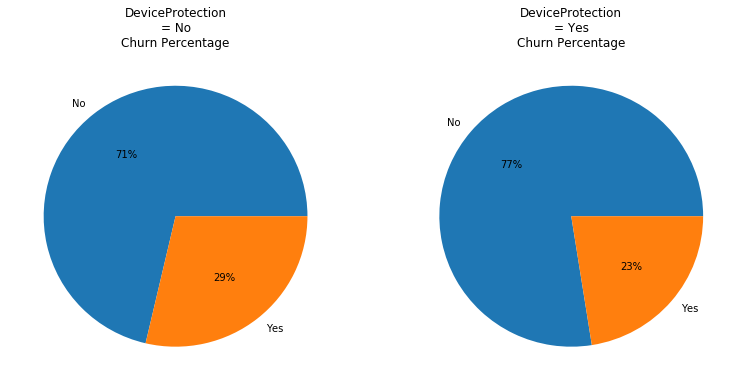

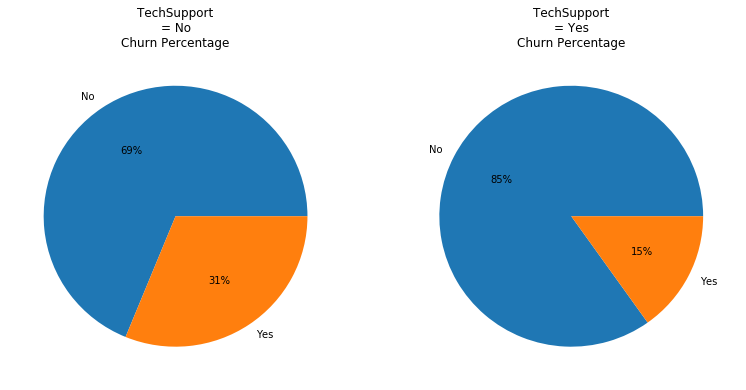

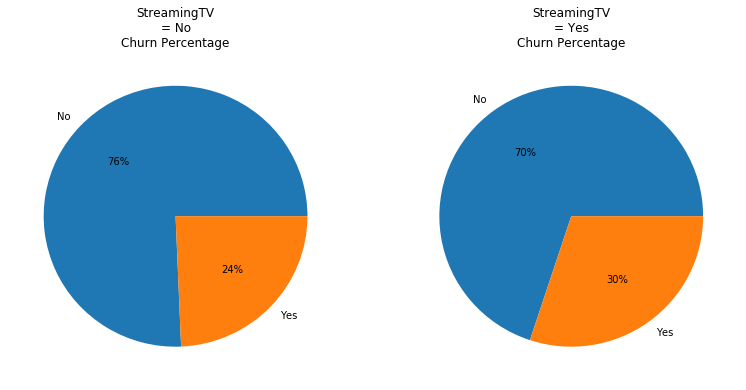

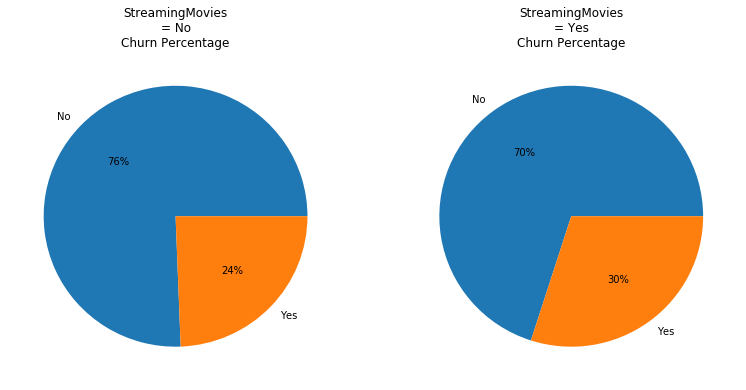

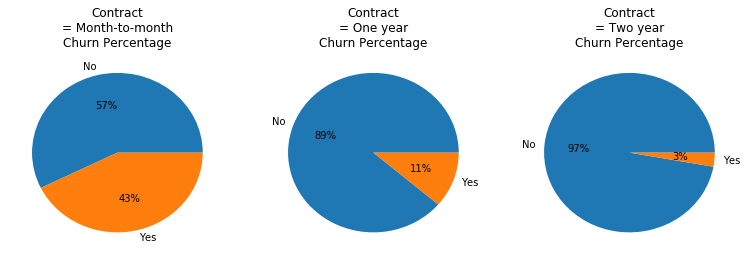

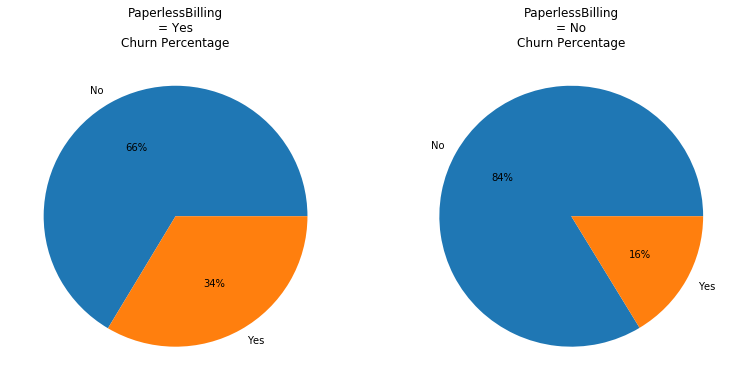

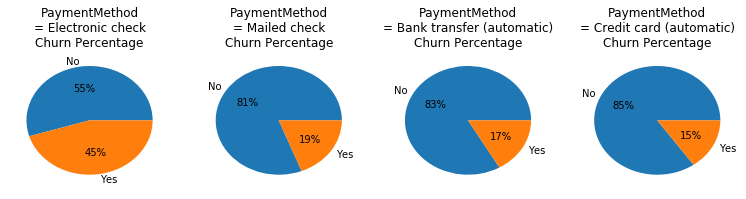

In [16]:
#Churn for each categorical variable
def plot_pie(indep_col_list, dep_col_list):
    for x in indep_col_list:
        ncols = df[x].nunique()
        for y in dep_col_list:
            plt.figure(figsize=(13,(14-ncols)/ncols)) #making sure the circles are not ovals
            index = 1
            for val in df[x].unique():
                df_subset = df[df[x]==val]
                
                plt.subplot(1,ncols,index)
                df_subset[y].value_counts().plot.pie(autopct  = "%1.0f%%")
                plt.title(x +'\n= '+ str(val) +'\n'+ y + ' Percentage')
                plt.ylabel("")
                index += 1
            plt.show()
           
plot_pie(cat_list, target_list)

### 2.2 EDA for Numerical Variables

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


First few entries of freq_table for tenure 

Churn    No  Yes  Total  ChurnPercentage
tenure                                  
0        11    0     11         0.000000
1       233  380    613         0.619902
2       115  123    238         0.516807
3       106   94    200         0.470000
4        93   83    176         0.471591


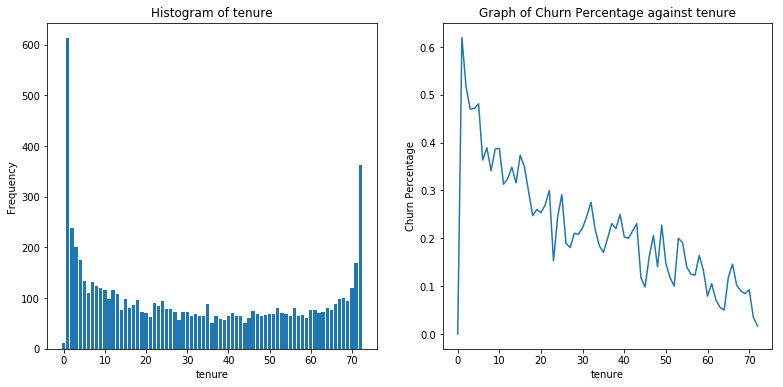

First few entries of freq_table for MonthlyCharges 

Churn           No  Yes  Total  ChurnPercentage
MonthlyCharges                                 
18.25            1    0      1              0.0
18.40            1    0      1              0.0
18.55            1    0      1              0.0
18.70            2    0      2              0.0
18.75            1    0      1              0.0


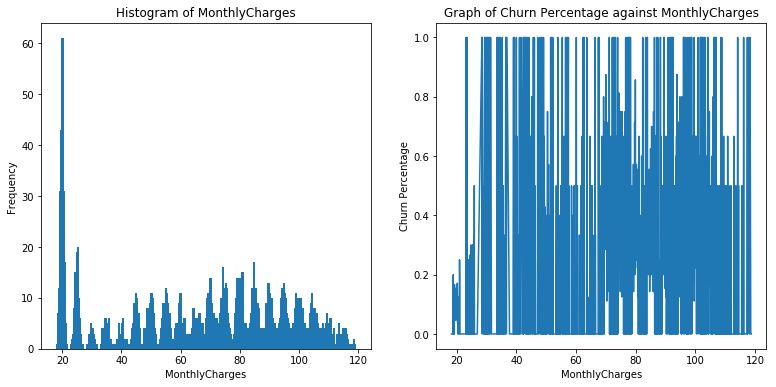

First few entries of freq_table for TotalCharges 

Churn         No  Yes  Total  ChurnPercentage
TotalCharges                                 
0.00          11    0     11              0.0
18.80          1    0      1              0.0
18.85          1    1      2              0.5
18.90          1    0      1              0.0
19.00          1    0      1              0.0


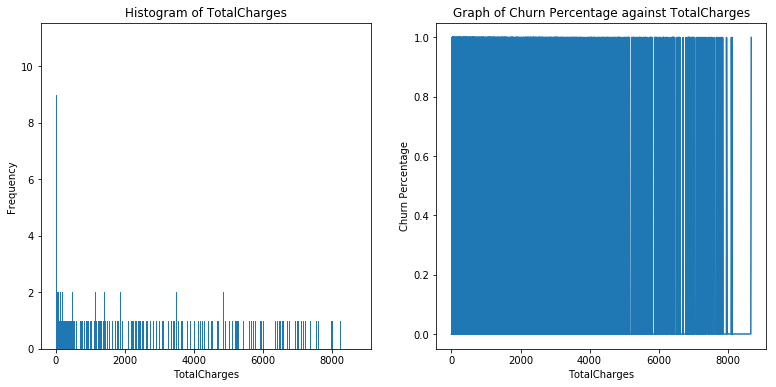

In [18]:
def plot_hist(num_list):
    for x in num_list:
        plt.figure(figsize=(13,6))

        freq_table = pd.crosstab(df[x], df['Churn'])
        freq_table['Total'] = freq_table['No']+freq_table['Yes']
        freq_table['ChurnPercentage'] = freq_table['Yes']/freq_table['Total']
        print('First few entries of freq_table for',x,'\n')
        print(freq_table.head())
        
        plt.subplot(1,2,1)
        plt.bar(freq_table.index, freq_table['Total'])
        plt.title('Histogram of '+x)
        plt.ylabel('Frequency')
        plt.xlabel(x)

        plt.subplot(1,2,2)
        plt.plot(freq_table['ChurnPercentage'])
        plt.title('Graph of Churn Percentage against ' + x)
        plt.ylabel('Churn Percentage')
        plt.xlabel(x)
    
        plt.show()

plot_hist(num_list)

In [19]:
#Group MonthlyCharges and TotalCharges to get better graphs of Churn Percentage
def label_MonthlyCharges(x):
    if x <= 20:
        return '0-20'
    elif x <= 40:
        return '20-40'
    elif x <= 60:
        return '40-60'
    elif x <= 80:
        return '60-80'
    elif x <= 100:
        return '80-100'
    else: return '>100'
    
df['MonthlyCharges_group'] = df['MonthlyCharges'].map(label_MonthlyCharges)

def label_TotalCharges(x):
    min, max = 0, 1000
    while max <= 9000:
        if min <= x and x < max:
            return str(int(min/1000))+'k-'+str(int(max/1000))+'k'
        min+=1000
        max+=1000

df['TotalCharges_group'] = df['TotalCharges'].map(label_TotalCharges)

First few entries of freq_table for MonthlyCharges_group 

Churn                   No  Yes  Total  ChurnPercentage
MonthlyCharges_group                                   
0-20                   598   58    656         0.088415
20-40                 1026  156   1182         0.131980
40-60                  804  276   1080         0.255556
60-80                  986  473   1459         0.324195
80-100                1111  653   1764         0.370181


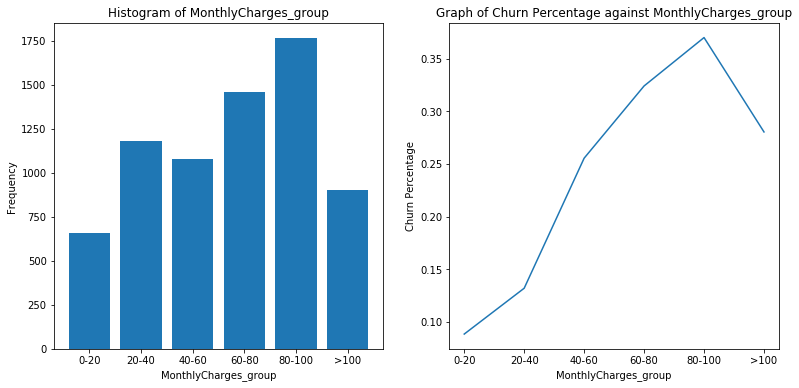

First few entries of freq_table for TotalCharges_group 

Churn                 No   Yes  Total  ChurnPercentage
TotalCharges_group                                    
0k-1k               1834  1070   2904         0.368457
1k-2k               1014   269   1283         0.209665
2k-3k                472   180    652         0.276074
3k-4k                449   107    556         0.192446
4k-5k                427    86    513         0.167641


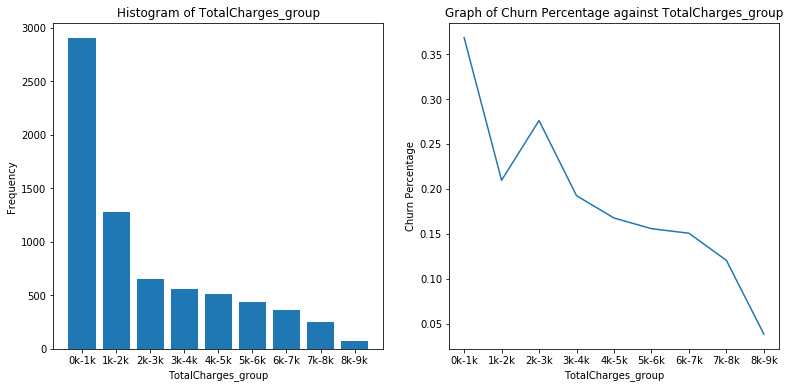

In [20]:
plot_hist(['MonthlyCharges_group', 'TotalCharges_group'])

## 3. Data Pre-Processing

### 3.1 Standardize Numerical Variables

In [21]:
# Load libraries
from sklearn.preprocessing import StandardScaler

# Scaling Numerical Columns
# Standardize features: Z-index
scaler = StandardScaler()
num_std = scaler.fit_transform(df[num_list])
num_std = pd.DataFrame(num_std, columns = num_list)

In [22]:
#Merging scaled numerical data with catergorical data
df_old = df.copy()
df = df.drop(columns = num_list)
df = df.merge(num_std, left_index=True, right_index=True, how='left')

### 3.2 Changing Binary Variables to 0 & 1

In [23]:
#Processing Binary Catergorical Variables
for name in ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', \
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'\
             , 'Churn']:
    df[name] = df[name].map(lambda x: 1 if x=='Yes' else 0)

In [24]:
df.dtypes

customerID               object
gender                   object
SeniorCitizen             int64
Partner                   int64
Dependents                int64
PhoneService              int64
MultipleLines             int64
InternetService          object
OnlineSecurity            int64
OnlineBackup              int64
DeviceProtection          int64
TechSupport               int64
StreamingTV               int64
StreamingMovies           int64
Contract                 object
PaperlessBilling          int64
PaymentMethod            object
Churn                     int64
MonthlyCharges_group     object
TotalCharges_group       object
tenure                  float64
MonthlyCharges          float64
TotalCharges            float64
dtype: object

### 3.3 Non Binary Categorical Variables

In [25]:
print(df['gender'].unique())
print(df['InternetService'].unique())
print(df['Contract'].unique())
print(df['PaymentMethod'].unique())

['Female' 'Male']
['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [26]:
df['Male'] = df['gender'].map(lambda x: 1 if x=='Male' else 0)
df = df.drop(columns = 'gender')

#Columns with non_binary categorical variables
df = pd.get_dummies(data = df, columns = ['InternetService', 'Contract', 'PaymentMethod'])

In [27]:
df.dtypes

customerID                                  object
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
Churn                                        int64
MonthlyCharges_group                        object
TotalCharges_group                          object
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
Male                           

In [28]:
df.describe()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,...,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,...,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


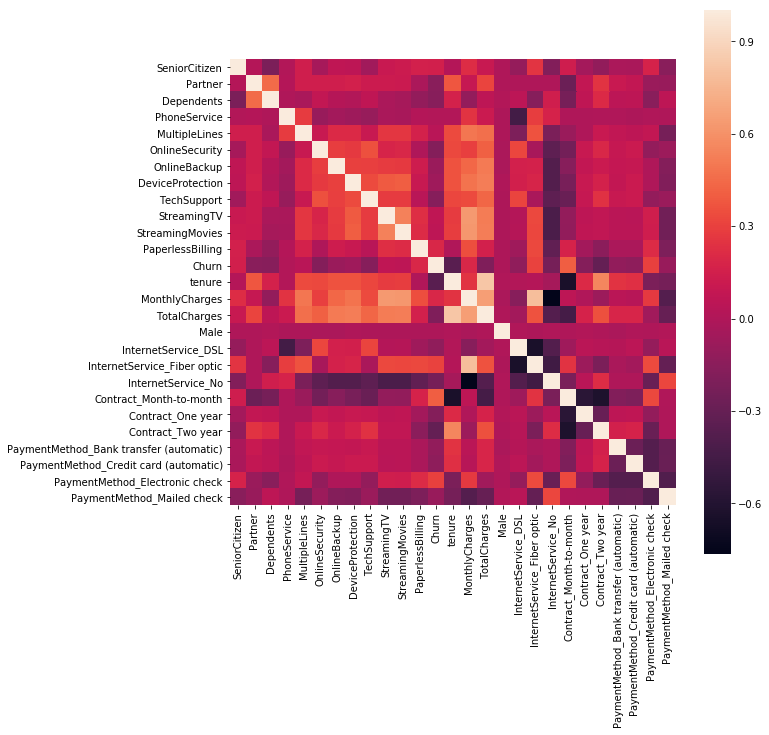

In [29]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, square = True, xticklabels=True, yticklabels=True)
plt.show()

In [30]:
# Checking for high correlation coefficients > 0.75
for i in cor.keys():
    for j in cor.keys():
        if cor[i][j] > 0.75 and cor[i][j] <1:
            print (cor[i][j], '=','cor('+i,',',j+')')

0.8261783979502383 = cor(tenure , TotalCharges)
0.787065528472674 = cor(MonthlyCharges , InternetService_Fiber optic)
0.8261783979502383 = cor(TotalCharges , tenure)
0.787065528472674 = cor(InternetService_Fiber optic , MonthlyCharges)


In [31]:
# For each of these variables with >0.75 with at least one other variable, we shall check if they have >0.6 cor with other variables
for i in ['tenure', 'TotalCharges', 'MonthlyCharges', 'InternetService_Fiber optic']:
    count = 0
    for j in cor.keys():
        if cor[j][i] > 0.6 and cor[j][i] <1:
            print (cor[i][j], '=','cor('+i,',',j+')')
            count +=1
    print(i, 'has a correlation coefficient >0.6 with',count,'other variables\n')

0.8261783979502383 = cor(tenure , TotalCharges)
tenure has a correlation coefficient >0.6 with 1 other variables

0.8261783979502383 = cor(TotalCharges , tenure)
0.6511738315787867 = cor(TotalCharges , MonthlyCharges)
TotalCharges has a correlation coefficient >0.6 with 2 other variables

0.6296031609781186 = cor(MonthlyCharges , StreamingTV)
0.6274288843898873 = cor(MonthlyCharges , StreamingMovies)
0.6511738315787867 = cor(MonthlyCharges , TotalCharges)
0.787065528472674 = cor(MonthlyCharges , InternetService_Fiber optic)
MonthlyCharges has a correlation coefficient >0.6 with 4 other variables

0.787065528472674 = cor(InternetService_Fiber optic , MonthlyCharges)
InternetService_Fiber optic has a correlation coefficient >0.6 with 1 other variables



In [32]:
# We shall remove TotalCharges and MonthlyCharges which are very dependent on other variables
df = df.drop(columns = ['TotalCharges', 'MonthlyCharges'])

## 4. Modelling

### 4.1 Baseline Model: Logistic Regression

In [33]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
features_list_old = features_list
features_list = df.columns.tolist()
features_list.remove('MonthlyCharges_group')
features_list.remove('TotalCharges_group')
for x in target_list: features_list.remove(x)
for x in id_list: features_list.remove(x)

In [35]:
X = df[features_list]
y = df[target_list[0]]

# Do train-test split: 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
# Create a 5-fold cross validation
kf = KFold(n_splits = 5, shuffle=True, random_state = 12345)

In [37]:
# For saving cross validation accuracy and confusion matrices for the different models
cv = {}
cm = {}
coeffs = {}
fpr = {}
tpr = {}
roc_auc = {}

In [38]:
def prediction(model, model_name, feature_weights):
    print('##### Model',model_name,'#####')

    # Cross Validation
    cv[model_name] = cross_val_score(model, # Cross-validation on model
                             X, # Feature matrix
                             y, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
    print('Report Average Cross-Validation Accuracy of',model_name+':')
    print(np.mean(cv[model_name])*100, '%')

    # Fit the model on train data
    model.fit(X=X_train, y=y_train)

    # Predict outputs for test data
    y_pred = model.predict(X_test)

    # Create confusion matrix
    cm[model_name] = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix of',model_name)
    print(cm[model_name])
    print("Confusion Matrix Prediction Accuracy: ", accuracy_score(y_test, y_pred)*100,'%')

    # ROC and AUC
    # Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
    # model.classes_
    score = model.predict_proba(X_test)[:, 1]

    # Plot ROC Curve
    fpr[model_name], tpr[model_name], thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
    roc_auc[model_name] = auc(fpr[model_name], tpr[model_name])

    plt.plot(fpr[model_name], tpr[model_name], label='AUC =coeff %0.2f'% roc_auc[model_name])
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title('Receiver operating characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # Get feature weights
    if feature_weights:
        if feature_weights == "coeff":
            weights = pd.DataFrame(model.coef_[0])
        elif feature_weights == "features":
            weights = pd.DataFrame(model.feature_importances_)
        # Bagging method makes use of many decision trees
        elif feature_weights == "bagging":
            weights = np.mean([tree.feature_importances_ for tree in model.estimators_], axis = 0)
            weights = pd.DataFrame(weights)

        coeffs[model_name] = pd.merge(pd.DataFrame(features_list),weights, left_index=True, right_index=True, how='left')
        coeffs[model_name].columns = ['Feature', 'Weights']
        coeffs[model_name] = coeffs[model_name].sort_values(by = 'Weights')

        plt.barh(coeffs[model_name]['Feature'], coeffs[model_name]['Weights'])
        plt.title('Feature Weights')
        plt.show()

        coeffs[model_name] = coeffs[model_name].sort_values(by = 'Weights', ascending=False)
        print(coeffs[model_name])

In [39]:
# Logistic regression using L1-regularization
lr1 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l1', C=100, random_state=0)

# Logistic regression using L2-regularization
lr2 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=0)

##### Model L1 Logistic Regression #####
Report Average Cross-Validation Accuracy of L1 Logistic Regression:
80.22154655139042 %

Confusion Matrix of L1 Logistic Regression
[[1397  163]
 [ 255  298]]
Confusion Matrix Prediction Accuracy:  80.21769995267393 %


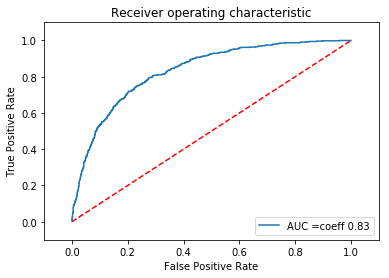

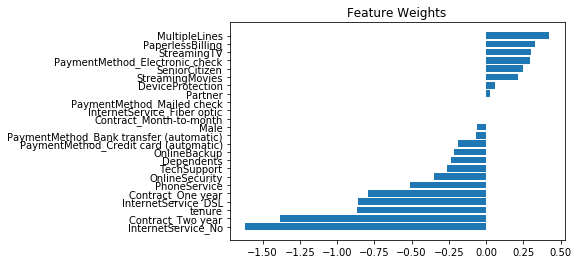

                                    Feature   Weights
4                             MultipleLines  0.423626
11                         PaperlessBilling  0.327018
9                               StreamingTV  0.299224
22           PaymentMethod_Electronic check  0.290942
0                             SeniorCitizen  0.248534
10                          StreamingMovies  0.213757
7                          DeviceProtection  0.060767
1                                   Partner  0.028867
17                  Contract_Month-to-month  0.000000
23               PaymentMethod_Mailed check  0.000000
15              InternetService_Fiber optic  0.000000
13                                     Male -0.064404
20  PaymentMethod_Bank transfer (automatic) -0.071210
21    PaymentMethod_Credit card (automatic) -0.186009
6                              OnlineBackup -0.215122
2                                Dependents -0.239137
8                               TechSupport -0.259774
5                           

In [40]:
prediction(lr1, 'L1 Logistic Regression', 'coeff')

##### Model L2 Logistic Regression #####
Report Average Cross-Validation Accuracy of L2 Logistic Regression:
80.22154655139042 %

Confusion Matrix of L2 Logistic Regression
[[1397  163]
 [ 255  298]]
Confusion Matrix Prediction Accuracy:  80.21769995267393 %


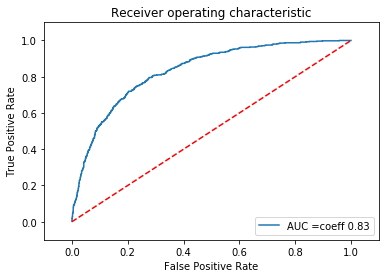

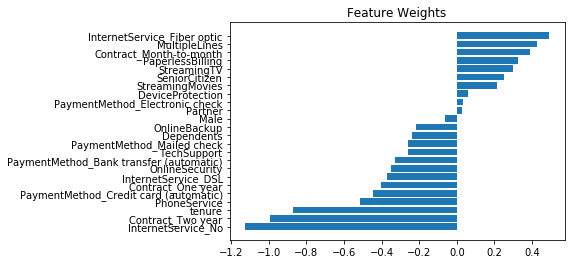

                                    Feature   Weights
15              InternetService_Fiber optic  0.491642
4                             MultipleLines  0.423676
17                  Contract_Month-to-month  0.390869
11                         PaperlessBilling  0.327058
9                               StreamingTV  0.299255
0                             SeniorCitizen  0.248565
10                          StreamingMovies  0.213790
7                          DeviceProtection  0.060853
22           PaymentMethod_Electronic check  0.031274
1                                   Partner  0.028969
13                                     Male -0.064465
6                              OnlineBackup -0.215190
2                                Dependents -0.239235
23               PaymentMethod_Mailed check -0.259634
8                               TechSupport -0.259829
20  PaymentMethod_Bank transfer (automatic) -0.330952
5                            OnlineSecurity -0.351097
14                      Inte

In [41]:
prediction(lr2, 'L2 Logistic Regression', 'coeff')

## 4.2 Improved Model: Ensemble Learning

In [42]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [43]:
# Model 1: Single decision tree model
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=12345)

# Model 2: Bagging method
bagging = BaggingClassifier(n_estimators=100, random_state=12345)

# Model 3: Random Forest method
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)

# Model 4: AdaBoosting method
Adaboost = AdaBoostClassifier(n_estimators=100, random_state=12345)

### 4.2.1 Method 1: Decision Tree Classifier

##### Model Decision Tree #####
Report Average Cross-Validation Accuracy of Decision Tree:
73.22187116910769 %

Confusion Matrix of Decision Tree
[[1287  273]
 [ 277  276]]
Confusion Matrix Prediction Accuracy:  73.97065783246569 %


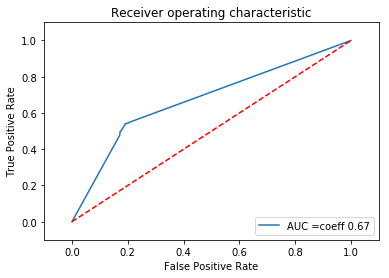

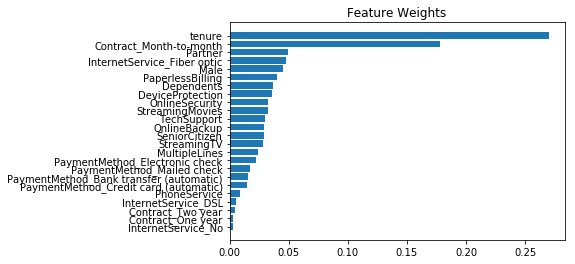

                                    Feature   Weights
12                                   tenure  0.269935
17                  Contract_Month-to-month  0.177776
1                                   Partner  0.049228
15              InternetService_Fiber optic  0.047409
13                                     Male  0.045045
11                         PaperlessBilling  0.039984
2                                Dependents  0.036461
7                          DeviceProtection  0.035389
5                            OnlineSecurity  0.032809
10                          StreamingMovies  0.032460
8                               TechSupport  0.030011
6                              OnlineBackup  0.028705
0                             SeniorCitizen  0.028695
9                               StreamingTV  0.028530
4                             MultipleLines  0.023929
22           PaymentMethod_Electronic check  0.021863
23               PaymentMethod_Mailed check  0.017143
20  PaymentMethod_Bank trans

In [44]:
# Model 1
prediction(decision_tree, 'Decision Tree', 'features')

### 4.2.2 Method 2: Bootstrap Aggregating Classifier

##### Model Bootstrap Aggregating #####
Report Average Cross-Validation Accuracy of Bootstrap Aggregating:
77.41024622556296 %

Confusion Matrix of Bootstrap Aggregating
[[1366  194]
 [ 283  270]]
Confusion Matrix Prediction Accuracy:  77.4254614292475 %


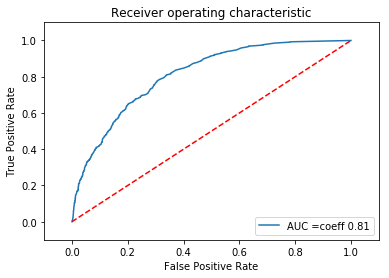

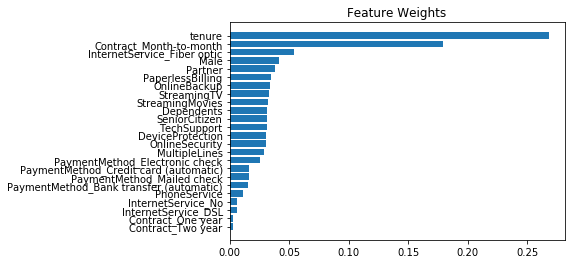

                                    Feature   Weights
12                                   tenure  0.267681
17                  Contract_Month-to-month  0.178942
15              InternetService_Fiber optic  0.054315
13                                     Male  0.041428
1                                   Partner  0.038106
11                         PaperlessBilling  0.034259
6                              OnlineBackup  0.033794
9                               StreamingTV  0.032982
10                          StreamingMovies  0.031764
2                                Dependents  0.031450
0                             SeniorCitizen  0.031285
8                               TechSupport  0.031172
7                          DeviceProtection  0.030819
5                            OnlineSecurity  0.030481
4                             MultipleLines  0.028728
22           PaymentMethod_Electronic check  0.025624
21    PaymentMethod_Credit card (automatic)  0.016494
23               PaymentMeth

In [45]:
# Model 2
prediction(bagging,'Bootstrap Aggregating',"bagging")

### 4.2.3 Method 3: Random Forest Classifier

##### Model Random Forest #####
Report Average Cross-Validation Accuracy of Random Forest:
77.93553213110523 %

Confusion Matrix of Random Forest
[[1380  180]
 [ 298  255]]
Confusion Matrix Prediction Accuracy:  77.37813535257926 %


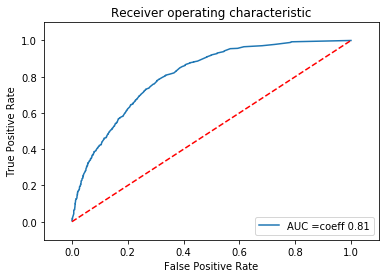

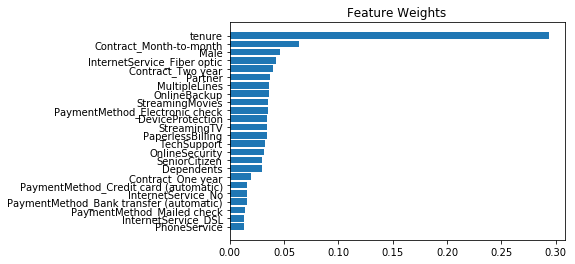

                                    Feature   Weights
12                                   tenure  0.293371
17                  Contract_Month-to-month  0.063642
13                                     Male  0.046161
15              InternetService_Fiber optic  0.042156
19                        Contract_Two year  0.040030
1                                   Partner  0.036941
4                             MultipleLines  0.036123
6                              OnlineBackup  0.035931
10                          StreamingMovies  0.035275
22           PaymentMethod_Electronic check  0.035143
7                          DeviceProtection  0.034700
9                               StreamingTV  0.034680
11                         PaperlessBilling  0.034669
8                               TechSupport  0.032259
5                            OnlineSecurity  0.031240
0                             SeniorCitizen  0.029891
2                                Dependents  0.029677
18                        Co

In [46]:
# Model 3
prediction(random_forest,'Random Forest',"features")

### 4.2.4 Method 4: AdaBoost Classifier

##### Model AdaBoost #####
Report Average Cross-Validation Accuracy of AdaBoost:
80.2783949770953 %

Confusion Matrix of AdaBoost
[[1397  163]
 [ 247  306]]
Confusion Matrix Prediction Accuracy:  80.59630856601989 %


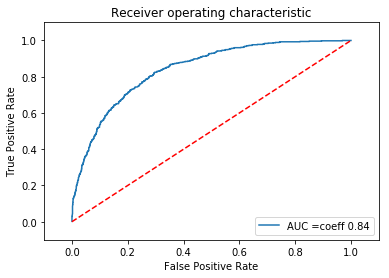

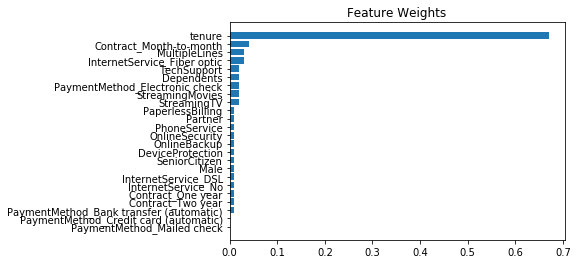

                                    Feature  Weights
12                                   tenure     0.67
17                  Contract_Month-to-month     0.04
4                             MultipleLines     0.03
15              InternetService_Fiber optic     0.03
8                               TechSupport     0.02
2                                Dependents     0.02
22           PaymentMethod_Electronic check     0.02
10                          StreamingMovies     0.02
9                               StreamingTV     0.02
1                                   Partner     0.01
11                         PaperlessBilling     0.01
3                              PhoneService     0.01
5                            OnlineSecurity     0.01
6                              OnlineBackup     0.01
7                          DeviceProtection     0.01
0                             SeniorCitizen     0.01
13                                     Male     0.01
14                      InternetService_DSL   

In [47]:
# Model 4
prediction(Adaboost,'AdaBoost',"features")

### 4.2.5 Method 5: KNN Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=5)

##### Model Kth Nearest Neighbours #####
Report Average Cross-Validation Accuracy of Kth Nearest Neighbours:
76.58675559713531 %

Confusion Matrix of Kth Nearest Neighbours
[[1328  232]
 [ 258  295]]
Confusion Matrix Prediction Accuracy:  76.81022243256034 %


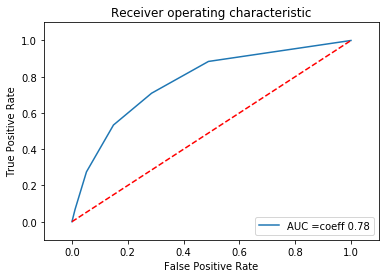

In [49]:
prediction(knn,'Kth Nearest Neighbours',None)

## 5. Model Results

### 5.1 Confusion Matrices

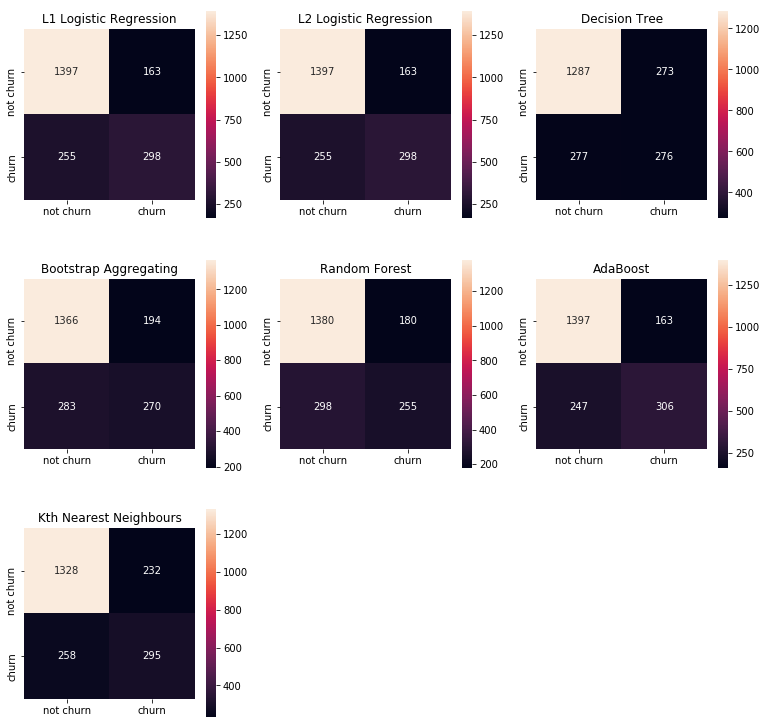

In [50]:
# Confusion matrices
plt.figure(figsize = (13,13))
i = 1
for x in cm:
    plt.subplot(3,3,i)
    sns.heatmap(cm[x], square=True, annot=True, fmt='d',
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"])
    plt.title(x)
    i+=1
plt.show()

### 5.2 Cross-Validation Accuracy

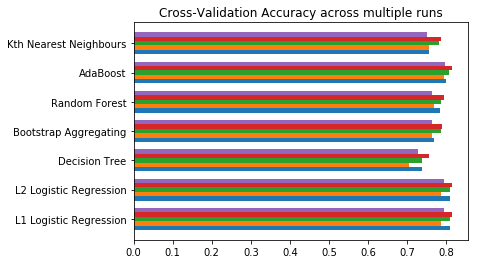

In [51]:
fig, ax = plt.subplots()
n = np.arange(len(cv))
width = 0.15
for i in range(len(cv['L2 Logistic Regression'])):
    ax.barh(n+i*width, [x[i] for x in list(cv.values())], width)
ax.set_yticks(n + (len(cv['L2 Logistic Regression'])-1)* width/2)
ax.set_yticklabels(list(cv.keys()))
plt.title('Cross-Validation Accuracy across multiple runs')
plt.show()

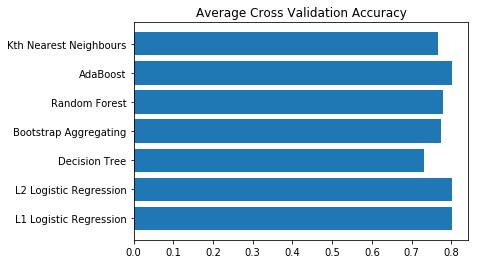

                                         Model  \
Model                                            
L1 Logistic Regression  L1 Logistic Regression   
L2 Logistic Regression  L2 Logistic Regression   
Decision Tree                    Decision Tree   
Bootstrap Aggregating    Bootstrap Aggregating   
Random Forest                    Random Forest   
AdaBoost                              AdaBoost   
Kth Nearest Neighbours  Kth Nearest Neighbours   

                        Average Cross Validation Accuracy  
Model                                                      
L1 Logistic Regression                           0.802215  
L2 Logistic Regression                           0.802215  
Decision Tree                                    0.732219  
Bootstrap Aggregating                            0.774102  
Random Forest                                    0.779355  
AdaBoost                                         0.802784  
Kth Nearest Neighbours                           0.765868  


In [52]:
# Average Cross-Validation Accuracy
keys = pd.DataFrame(list(cv.keys()))
cv_vals = pd.DataFrame(np.mean(list(cv.values()), axis=1))
cv_ave = pd.merge(keys, cv_vals, left_index=True, right_index=True, how='left')
cv_ave.columns = (('Model', 'Average Cross Validation Accuracy'))
cv_ave = cv_ave.set_index('Model', drop=False)
plt.barh(cv_ave['Model'], cv_ave['Average Cross Validation Accuracy'])
plt.title('Average Cross Validation Accuracy')
plt.show()
print(cv_ave)

### 5.3 ROC Curves

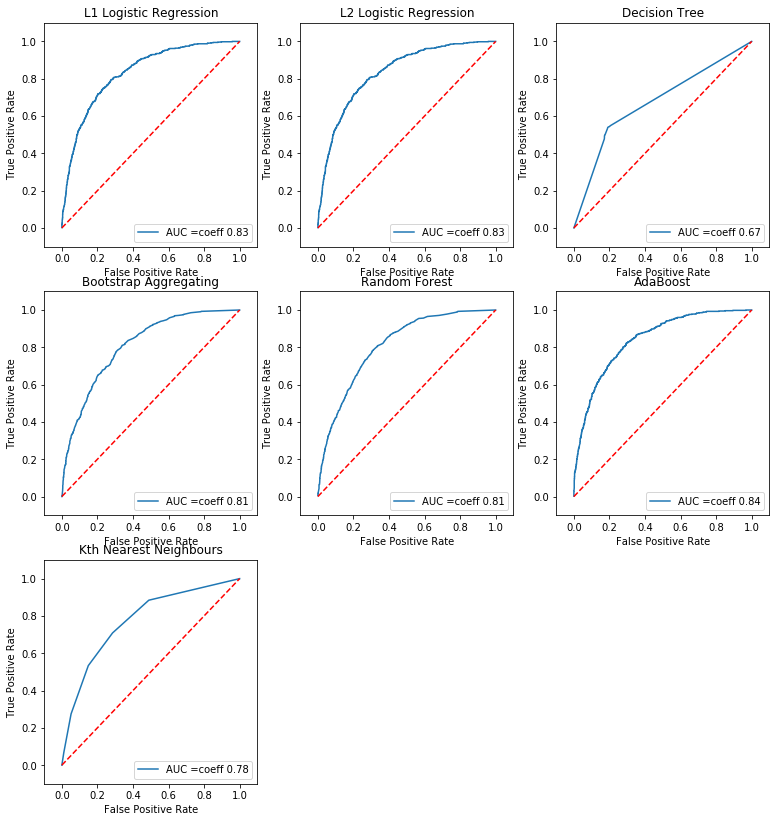

In [53]:
plt.figure(figsize = (13,14))
i = 1
for model_name in keys[0]:
    plt.subplot(3,3,i)
    
    plt.plot(fpr[model_name], tpr[model_name], label='AUC =coeff %0.2f'% roc_auc[model_name])
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title(model_name)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    i+=1
plt.show()

### 5.4 Overall Coefficient Weights

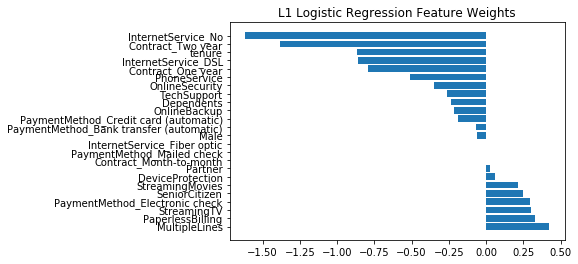

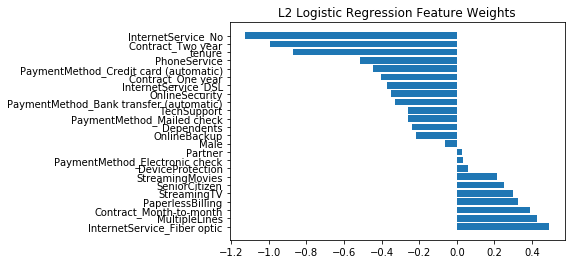

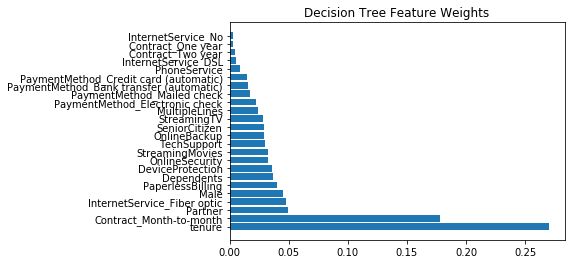

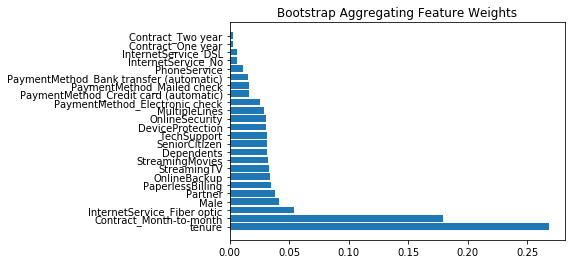

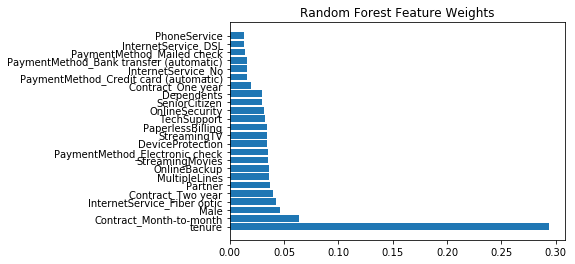

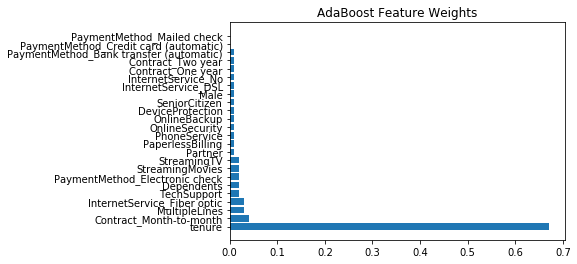

In [54]:
for model_name in keys[0][:-1]:
    plt.barh(coeffs[model_name]['Feature'], coeffs[model_name]['Weights'])
    plt.title(model_name +' Feature Weights')
    plt.show()

We shall apply the following steps to obtain the final Feature Weights from the 7 models:
1. Square all the Feature Weights to account for negative values
2. Multiply Feature Weights^2 by the Model's Average Cross-Validation Accuracy to get the weighted Feature weight based on how accurate each model is
3. Sum the weights from all the models

These feature weights are relative to each other.

In [55]:
coeffs_new = coeffs.copy()

In [56]:
for model in keys[0][:-1]:
    coeffs_new[model]['Weights'] = coeffs[model]['Weights'].\
    map(lambda x: cv_ave.loc[model, 'Average Cross Validation Accuracy']\
        *(x**2))

In [57]:
coeffs_new['total'] = coeffs_new['L1 Logistic Regression']
coeffs_new['total']['Weights']= np.sum([coeffs_new[model]['Weights'] for model in coeffs],axis=0)

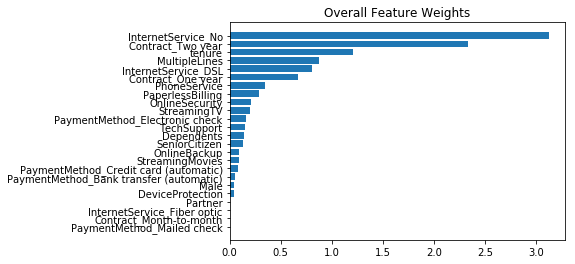

                                    Feature   Weights
16                       InternetService_No  3.120697
19                        Contract_Two year  2.327817
12                                   tenure  1.211118
4                             MultipleLines  0.874136
14                      InternetService_DSL  0.806220
18                        Contract_One year  0.665107
3                              PhoneService  0.341366
11                         PaperlessBilling  0.282157
5                            OnlineSecurity  0.209312
9                               StreamingTV  0.200829
22           PaymentMethod_Electronic check  0.158798
8                               TechSupport  0.154216
2                                Dependents  0.135377
0                             SeniorCitizen  0.125573
6                              OnlineBackup  0.093182
10                          StreamingMovies  0.089683
21    PaymentMethod_Credit card (automatic)  0.084040
20  PaymentMethod_Bank trans

In [58]:
coeffs_new['total'] = coeffs_new['total'].sort_values(by = 'Weights')

plt.barh(coeffs_new['total']['Feature'], coeffs_new['total']['Weights'])
plt.title('Overall' +' Feature Weights')
plt.show()

coeffs_new['total'] = coeffs_new['total'].sort_values(by = 'Weights', ascending=False)
print(coeffs_new['total'])